#For Text Mining assignment

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Elon_musk.csv' ,encoding='ISO-8859-1')
data

,Index,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
data.drop('Index',axis=1,inplace=True)

In [ ]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
data['Text'] = data['Text'].str.replace("[^A-Za-z]+"," ",).str.lower()
data['Text']=data['Text'].str.replace("[0-9]+","")
data

<ipython-input-210-b65c882bbfdc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace("[^A-Za-z]+"," ",).str.lower()
<ipython-input-210-b65c882bbfdc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text']=data['Text'].str.replace("[0-9]+","")


,Text
0,kunalb i m an alien
1,id aa carmack ray tracing on cyberpunk with h...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazi...
...,...
1994,flcnhvy true it sounds so surreal but the neg...
1995,ppathole make sure to read ur terms amp condi...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is u f u f


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(data, *['compound'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(data, *['compound'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(data, *['comp_score'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(data, *['compound', 'comp_score'], **{'inner': 'box'})
chart

In [ ]:
string= data['Text'].str.split(" ")

In [ ]:
string

0                             [, kunalb, i, m, an, alien]
1       [, id, aa, carmack, ray, tracing, on, cyberpun...
2               [, joerogan, spotify, great, interview, ]
3                     [, gtera, doge, is, underestimated]
4       [, teslacn, congratulations, tesla, china, for...
                              ...                        
1994    [, flcnhvy, true, it, sounds, so, surreal, but...
1995    [, ppathole, make, sure, to, read, ur, terms, ...
1996             [, teslagong, ppathole, samwise, gamgee]
1997    [, ppathole, altho, dumb, and, dumber, is, u, ...
1998                         [progress, update, august, ]
Name: Text, Length: 1999, dtype: object

In [ ]:
ret = re.sub("[^A-Za-z]+"," ","abc@Xy8z")
ret

'abc Xy z'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

flat_list = [word for sublist in string for word in sublist]

# Joinining all the reviews into single paragraph

In [ ]:
flat_list

['',
 'kunalb',
 'i',
 'm',
 'an',
 'alien',
 '',
 'id',
 'aa',
 'carmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'next',
 'level',
 'have',
 'you',
 'tried',
 'it',
 '',
 '',
 'joerogan',
 'spotify',
 'great',
 'interview',
 '',
 '',
 'gtera',
 'doge',
 'is',
 'underestimated',
 '',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 'https',
 't',
 'co',
 'wfkmyu',
 'oj',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 'https',
 't',
 'co',
 'zgxjfdzzrm',
 '',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'thanks',
 '',
 '',
 'flcnhvy',
 'anonyx',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 '',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',


In [ ]:
stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

ip_reviews_words = [w for w in flat_list if not w in stop_words]

# Joining all the reviews into a single paragraph
ip_rev_string = " ".join(ip_reviews_words)

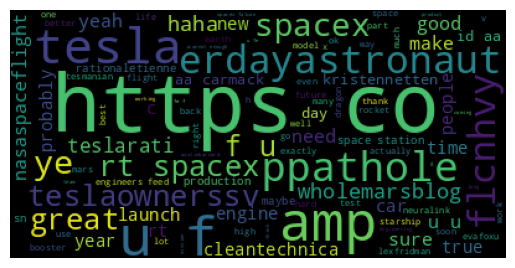

In [ ]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [ ]:
# positive words # Choose the path for +ve words stored in system
with open("/content/positive-words (1).txt","r") as pos:
    poswords = pos.read().split("\n")

In [ ]:
print(poswords)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [ ]:
# negative words  Choose path for -ve words stored in system
with open("/content/negative-words (1).txt","r",encoding='latin-1') as neg:
    negwords = neg.read().split("\n")

In [ ]:
print(negwords)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Negative', ';', '; This file contains a list of NEGATIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a sent

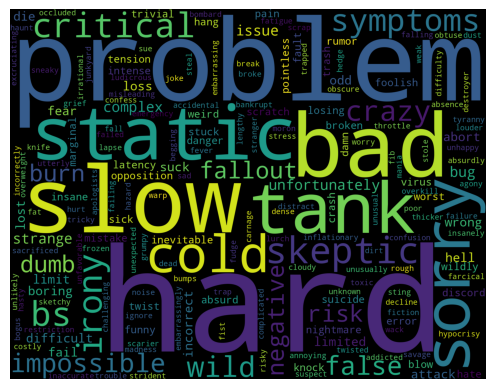

In [ ]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

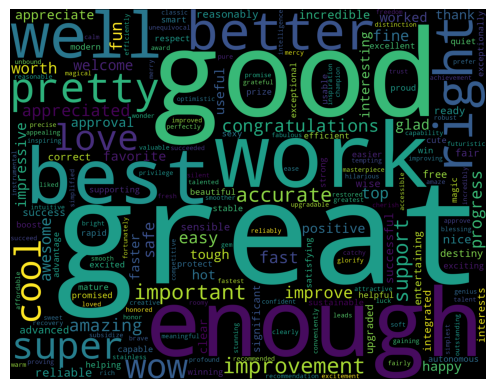

In [ ]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [ ]:
len(ip_pos_in_pos)

8519

In [ ]:
len(ip_neg_in_neg)

5318

In [ ]:
len(ip_reviews_words)

19485

In [ ]:
8519/19485

0.4372081088016423

In [ ]:
5318/19485

0.2729278932512189

#Vader Lexicon

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
data.loc[0]['Text']

' kunalb i m an alien'

In [ ]:
sia.polarity_scores(data.loc[0]['Text'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
data['scores'] = data['Text'].apply(lambda Text: sia.polarity_scores(Text))
data.head()

,Text,scores
0,kunalb i m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,id aa carmack ray tracing on cyberpunk with h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,gtera doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
4,teslacn congratulations tesla china for amazi...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [ ]:
data['compound']  = data['scores'].apply(lambda scores: scores['compound'])
data.head()

,Text,scores,compound
0,kunalb i m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,id aa carmack ray tracing on cyberpunk with h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,gtera doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732
4,teslacn congratulations tesla china for amazi...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271


In [ ]:
data['scores'][0]['compound']

0.0

In [ ]:
data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [ ]:
data.head()

,Text,scores,compound,comp_score
0,kunalb i m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,id aa carmack ray tracing on cyberpunk with h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,pos
3,gtera doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,neg
4,teslacn congratulations tesla china for amazi...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.8271,pos


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['compound'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['compound'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_9, *['Text'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_10, *['comp_score'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['Text', 'comp_score'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['compound', 'Text'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['compound', 'comp_score'], **{'inner': 'stick'})
chart